<a href="https://www.kaggle.com/code/lalit7881/network-anomaly-detection-dataset?scriptVersionId=299926104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-anoamly-dataset/networkanomalydataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/network-anoamly-dataset/networkanomalydataset.csv")

In [3]:
df.head()

,Inbound Rate(bit/s),Outbound Rate(bit/s),Inbound Bandwidth Utilization(%),Outbound Bandwidth Utilization(%),Label
0,0.931000,1.224246,0.931001,1.224244,0
1,0.965773,1.302733,0.965944,1.303585,0
2,1.018103,1.341763,1.017932,1.342183,0
3,1.088629,1.374144,1.088671,1.374348,0
4,1.128772,1.381435,1.128727,1.380781,0


In [4]:
df.tail()

,Inbound Rate(bit/s),Outbound Rate(bit/s),Inbound Bandwidth Utilization(%),Outbound Bandwidth Utilization(%),Label
1649,-0.812597,-0.794386,-0.812689,-0.794353,1
1650,-0.851719,-0.828830,-0.851759,-0.828282,1
1651,-0.805748,-0.783637,-0.805701,-0.783864,1
1652,-0.813245,-0.799612,-0.813341,-0.799477,1
1653,-0.824283,-0.812394,-0.824442,-0.813079,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Inbound Rate(bit/s)                1654 non-null   float64
 1   Outbound Rate(bit/s)               1654 non-null   float64
 2   Inbound Bandwidth Utilization(%)   1654 non-null   float64
 3   Outbound Bandwidth Utilization(%)  1654 non-null   float64
 4   Label                              1654 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 64.7 KB


In [6]:
df.describe()

,Inbound Rate(bit/s),Outbound Rate(bit/s),Inbound Bandwidth Utilization(%),Outbound Bandwidth Utilization(%),Label
count,1.654000e+03,1.654000e+03,1.654000e+03,1.654000e+03,1654.000000
mean,1.374690e-16,-1.374690e-16,-6.873448e-17,2.062035e-16,0.500000
std,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,0.500151
min,-8.587873e-01,-8.451589e-01,-8.587677e-01,-8.450422e-01,0.000000
25%,-8.071507e-01,-8.063695e-01,-8.072172e-01,-8.064441e-01,0.000000
50%,-7.555341e-01,-7.747574e-01,-7.554490e-01,-7.751713e-01,0.500000
75%,9.628647e-01,1.112895e+00,9.627478e-01,1.112738e+00,1.000000
max,2.122913e+00,1.997753e+00,2.122901e+00,1.998350e+00,1.000000


In [7]:
df.dtypes

Inbound Rate(bit/s)                  float64
Outbound Rate(bit/s)                 float64
Inbound Bandwidth Utilization(%)     float64
Outbound Bandwidth Utilization(%)    float64
Label                                  int64
dtype: object

In [8]:
df.shape

(1654, 5)

In [9]:
df.isnull().sum()

Inbound Rate(bit/s)                  0
Outbound Rate(bit/s)                 0
Inbound Bandwidth Utilization(%)     0
Outbound Bandwidth Utilization(%)    0
Label                                0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['Inbound Rate(bit/s)', 'Outbound Rate(bit/s)',
       'Inbound Bandwidth Utilization(%)', 'Outbound Bandwidth Utilization(%)',
       'Label'],
      dtype='object')

In [12]:
df.nunique()

Inbound Rate(bit/s)                  1632
Outbound Rate(bit/s)                 1615
Inbound Bandwidth Utilization(%)     1550
Outbound Bandwidth Utilization(%)    1281
Label                                   2
dtype: int64

## EDA

In [13]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Clean column names
df.columns = df.columns.str.strip()

In [14]:
numeric_cols = [
    'Inbound Rate(bit/s)',
    'Outbound Rate(bit/s)',
    'Inbound Bandwidth Utilization(%)',
    'Outbound Bandwidth Utilization(%)'
]

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

In [15]:
print(df.describe())

       Inbound Rate(bit/s)  Outbound Rate(bit/s)  \
count         1.654000e+03          1.654000e+03   
mean          1.374690e-16         -1.374690e-16   
std           1.000302e+00          1.000302e+00   
min          -8.587873e-01         -8.451589e-01   
25%          -8.071507e-01         -8.063695e-01   
50%          -7.555341e-01         -7.747574e-01   
75%           9.628647e-01          1.112895e+00   
max           2.122913e+00          1.997753e+00   

       Inbound Bandwidth Utilization(%)  Outbound Bandwidth Utilization(%)  \
count                      1.654000e+03                       1.654000e+03   
mean                      -6.873448e-17                       2.062035e-16   
std                        1.000302e+00                       1.000302e+00   
min                       -8.587677e-01                      -8.450422e-01   
25%                       -8.072172e-01                      -8.064441e-01   
50%                       -7.554490e-01                      -7

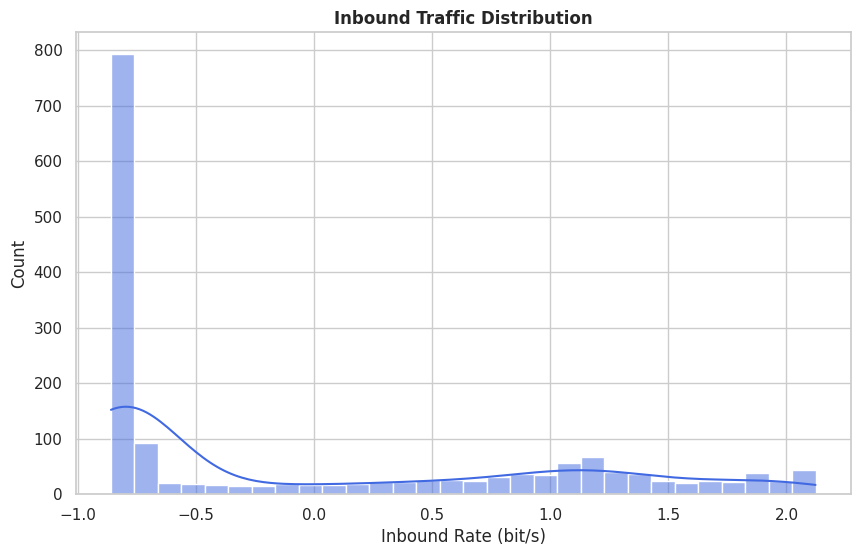

In [16]:
plt.figure()
sns.histplot(df['Inbound Rate(bit/s)'], bins=30, kde=True, color='royalblue')
plt.title("Inbound Traffic Distribution", fontweight='bold')
plt.xlabel("Inbound Rate (bit/s)")
plt.show()

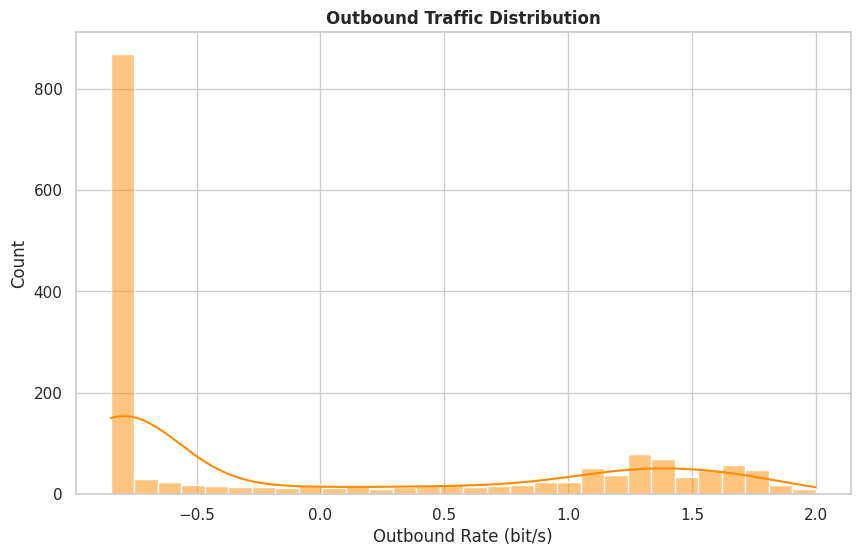

In [17]:
plt.figure()
sns.histplot(df['Outbound Rate(bit/s)'], bins=30, kde=True, color='darkorange')
plt.title("Outbound Traffic Distribution", fontweight='bold')
plt.xlabel("Outbound Rate (bit/s)")
plt.show()

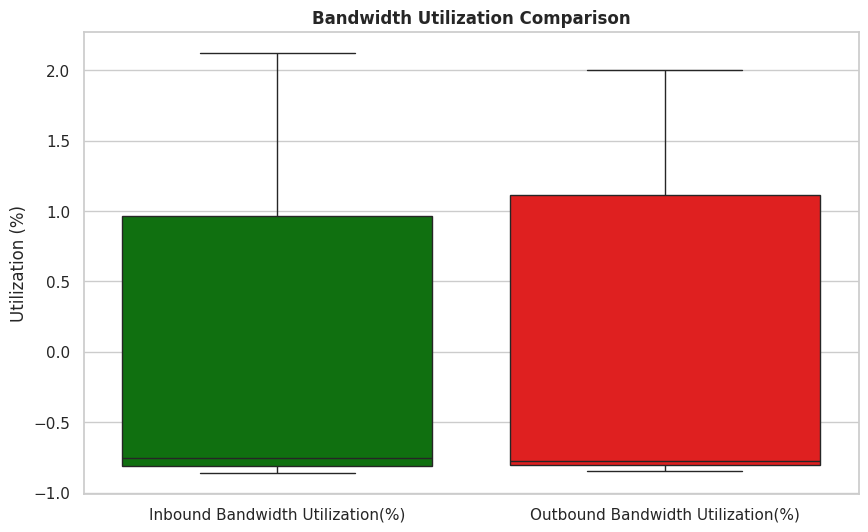

In [18]:
plt.figure()
sns.boxplot(data=df[['Inbound Bandwidth Utilization(%)',
                     'Outbound Bandwidth Utilization(%)']],
            palette=['green','red'])

plt.title("Bandwidth Utilization Comparison", fontweight='bold')
plt.ylabel("Utilization (%)")
plt.show()

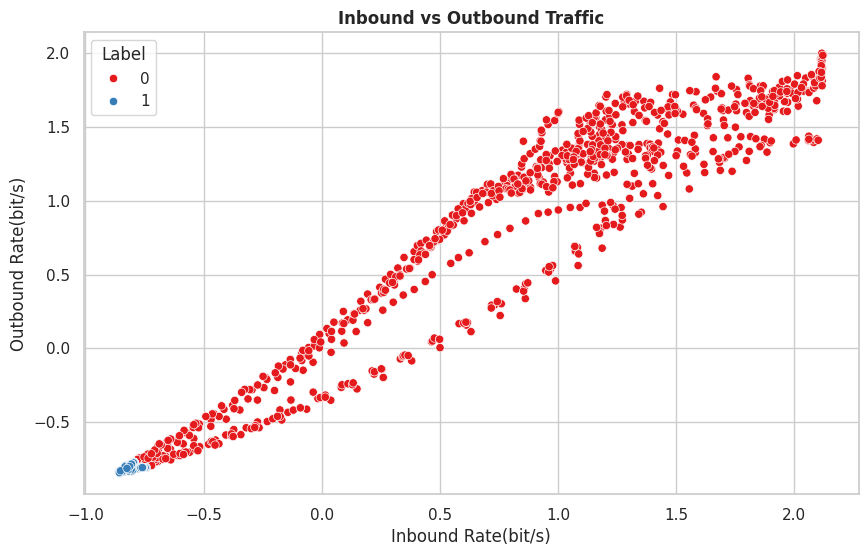

In [19]:
plt.figure()
sns.scatterplot(
    data=df,
    x='Inbound Rate(bit/s)',
    y='Outbound Rate(bit/s)',
    hue='Label',
    palette='Set1'
)

plt.title("Inbound vs Outbound Traffic", fontweight='bold')
plt.show()

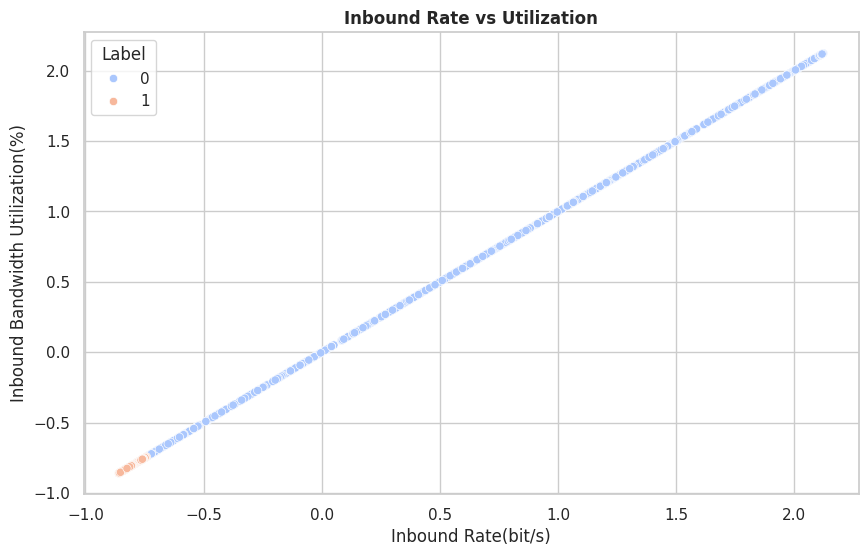

In [20]:
plt.figure()
sns.scatterplot(
    data=df,
    x='Inbound Rate(bit/s)',
    y='Inbound Bandwidth Utilization(%)',
    hue='Label',
    palette='coolwarm'
)

plt.title("Inbound Rate vs Utilization", fontweight='bold')
plt.show()

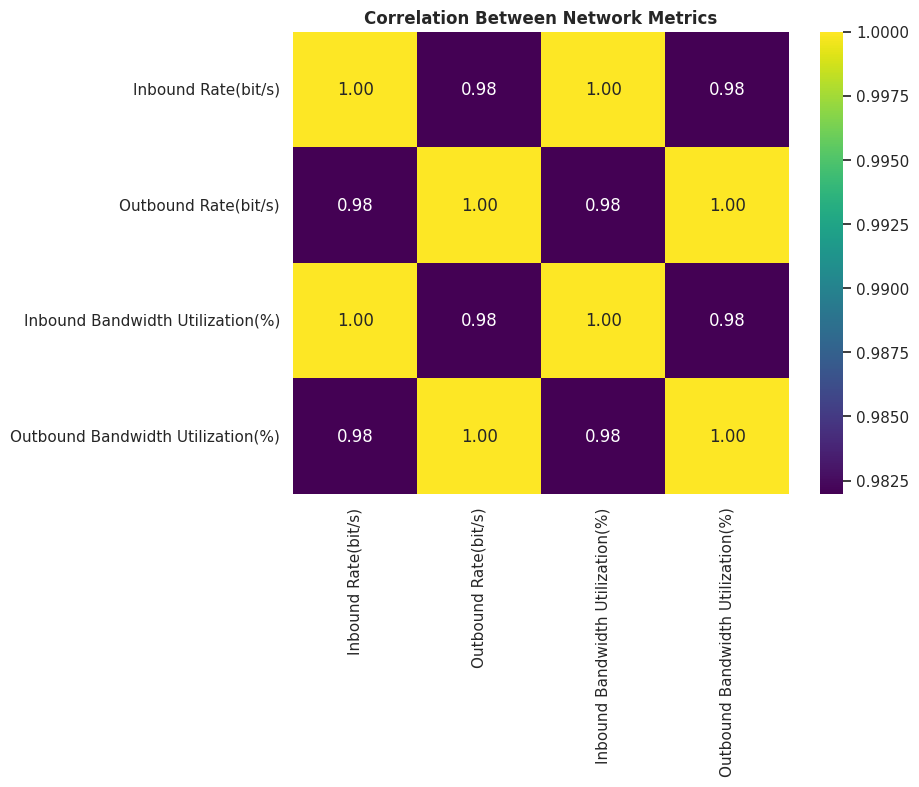

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,
    cmap='viridis',
    fmt=".2f"
)

plt.title("Correlation Between Network Metrics", fontweight='bold')
plt.show()

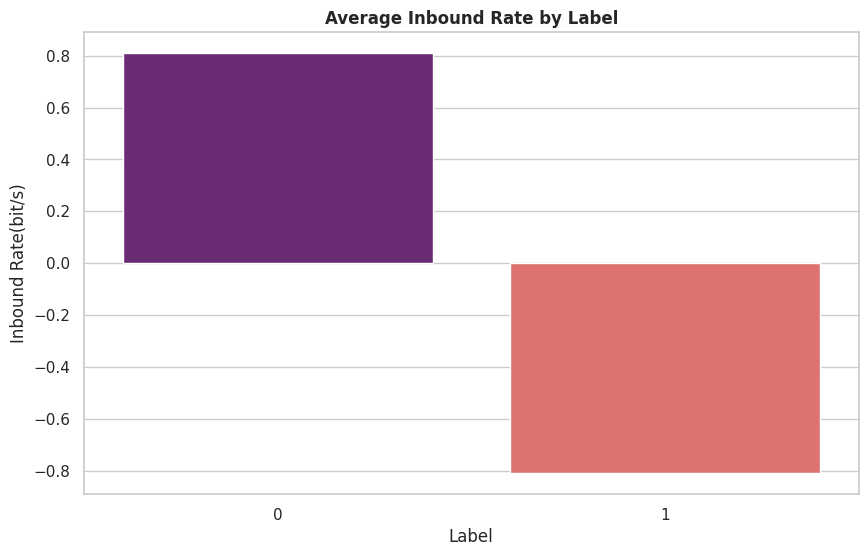

In [22]:
label_summary = df.groupby('Label')[numeric_cols].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=label_summary,
    x='Label',
    y='Inbound Rate(bit/s)',
    palette='magma'
)

plt.title("Average Inbound Rate by Label", fontweight='bold')
plt.show()

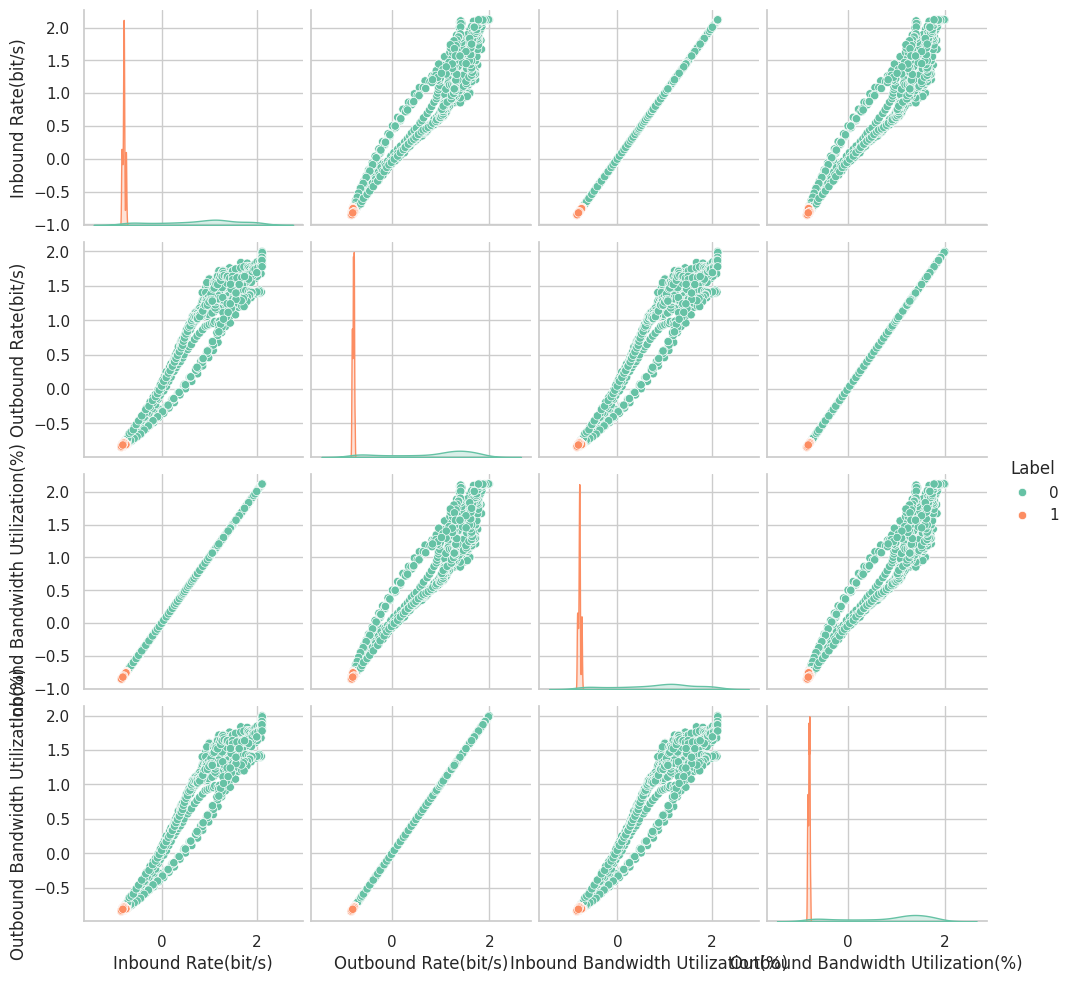

In [23]:
sns.pairplot(
    df[numeric_cols + ['Label']],
    hue='Label',
    palette='Set2'
)
plt.show()

## Feature engg

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [25]:
df.columns = df.columns.str.strip()

numeric_cols = [
    'Inbound Rate(bit/s)',
    'Outbound Rate(bit/s)',
    'Inbound Bandwidth Utilization(%)',
    'Outbound Bandwidth Utilization(%)'
]

# Clean numeric columns
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

# Encode target
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

X = df[numeric_cols]
y = df['Label']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    
    pipeline = ImbPipeline(steps=[
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.9546827794561934
Confusion Matrix:
 [[151  15]
 [  0 165]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       166
           1       0.92      1.00      0.96       165

    accuracy                           0.95       331
   macro avg       0.96      0.95      0.95       331
weighted avg       0.96      0.95      0.95       331


Random Forest
Accuracy: 0.9969788519637462
Confusion Matrix:
 [[166   0]
 [  1 164]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       166
           1       1.00      0.99      1.00       165

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331


Gradient Boosting
Accuracy: 0.9969788519637462
Confusion Matrix:
 [[166   0]
 [  1 164]]
Classification Report:
       

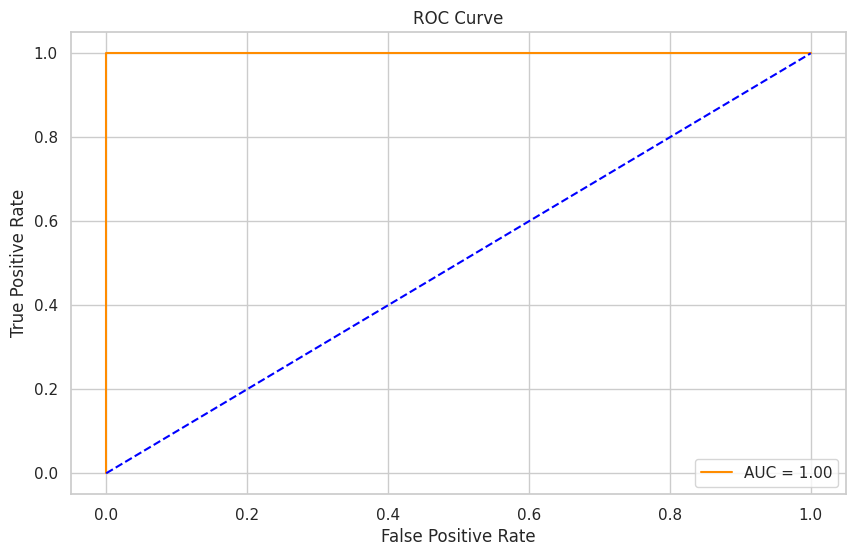

In [28]:
rf_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)
y_prob = rf_pipeline.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='blue')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [29]:
cv_scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='accuracy')
print("Cross Validation Accuracy:", cv_scores.mean())

Cross Validation Accuracy: 0.9969788519637464


In [30]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

grid = GridSearchCV(rf_pipeline, param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best Score: 0.997732426303855


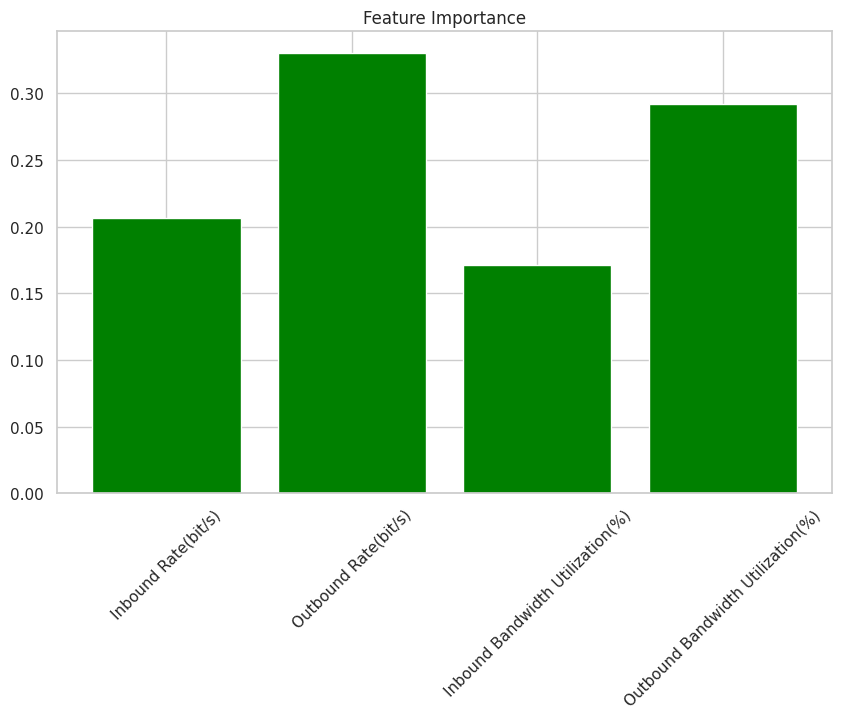

In [31]:
best_model = grid.best_estimator_

importances = best_model.named_steps['classifier'].feature_importances_

plt.bar(numeric_cols, importances, color='green')
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

In [32]:
def predict_traffic(in_rate, out_rate, in_util, out_util):
    
    input_data = pd.DataFrame([[
        in_rate, out_rate, in_util, out_util
    ]], columns=numeric_cols)
    
    prediction = best_model.predict(input_data)
    return le.inverse_transform(prediction)[0]

# Example
print(predict_traffic(500000, 200000, 45, 30))

0


## Thank you..pls upvote!!!!!